# Evolución de la generación

In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window



//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.8.3`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    //.config("spark.executor.instances", "4") // Número de ejecutores
    //.config("spark.executor.memory", "4g") // Memoria por ejecutor
    //.config("spark.executor.cores", "2") // Núcleos por ejecutor
    //.config("spark.driver.memory", "4g") // Memoria del driver
    //.config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs

Creating SparkSession

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

import $ivy.$
import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window
import org.apache.log4j.{Level, Logger}
import $ivy.$
import $ivy.$
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@28a34c3e
import spark.implicits._

In [6]:
val filePath = "../../data/parquet/dsBalanceNacional11-25.parquet"         
val dataFrameBalance: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .parquet(filePath)


val pathDatosConsulta1 = "../../data/parquet/dsDatosBalanceAnuales.parquet"
val dfGeneracionAnual: DataFrame = spark.read
  //.option("header", "true") // Si el archivo tiene un encabezado
  //.option("inferSchema", "true") // Para inferir automáticamente el esquema
  //.csv(filePath)
    .option("encoding", "UTF-8")
    .parquet(pathDatosConsulta1)

filePath: String = "../../data/parquet/dsBalanceNacional11-25.parquet"
dataFrameBalance: DataFrame = [Familia: string, Tipo: string ... 5 more fields]
pathDatosConsulta1: String = "../../data/parquet/dsDatosBalanceAnuales.parquet"
dfGeneracionAnual: DataFrame = [Año: string, Familia: string ... 8 more fields]

In [7]:
dataFrameBalance.orderBy(desc("Fecha")).show()

+--------------+--------------------+---------+--------------------+-------------------+-------------------+--------------+
|       Familia|                Tipo|Compuesto|          Porcentaje|              Valor|              Fecha|BajasEmisiones|
+--------------+--------------------+---------+--------------------+-------------------+-------------------+--------------+
|Almacenamiento|Saldo almacenamiento|     true|                 1.0|-14095.899999999998|2025-01-31 01:00:00|         false|
|  No-Renovable|      Motores diésel|    false|0.018889646440936953|             4649.9|2025-01-31 01:00:00|         false|
|Almacenamiento|     Consumos bombeo|    false|  0.7327646279801713|           -22187.6|2025-01-31 01:00:00|         false|
|     Renovable|    Otras renovables|    false|0.022434735319143053|          10451.092|2025-01-31 01:00:00|          true|
|  No-Renovable|              Carbón|    false|0.031015679052463906|            7634.86|2025-01-31 01:00:00|         false|
|  No-Re

### Creamos los datasets

In [3]:
org.apache.spark.sql.catalyst.encoders.OuterScopes.addOuterScope(this);
case class Balance(
    Familia: String,
    Tipo: String,
    Compuesto: Boolean,
    Fecha: java.sql.Timestamp,
    Valor: Double,
    Porcentaje: Double,
    BajasEmisiones: Boolean
)

val dsBalance: Dataset[Balance] = dataFrameBalance.as[Balance]

case class BalanceAnual(
    Año: String,
    Familia: String,
    Tipo: String,
    Compuesto: Boolean,
    BajasEmisiones: Boolean, 
    ValorAnual: Double,
    PorcentajeAnualSobreFamilia: Double, 
    TotalGenerado: Double, 
    PorcentajeSobreTotal: Double, 
    PorcentajeBajasEmisiones: Double
)

val dsGeneraciónAnual: Dataset[BalanceAnual] = dfGeneracionAnual.as[BalanceAnual]

defined class Balance
dsBalance: Dataset[Balance] = [Familia: string, Tipo: string ... 5 more fields]
defined class BalanceAnual
dsGeneraciónAnual: Dataset[BalanceAnual] = [Año: string, Familia: string ... 8 more fields]

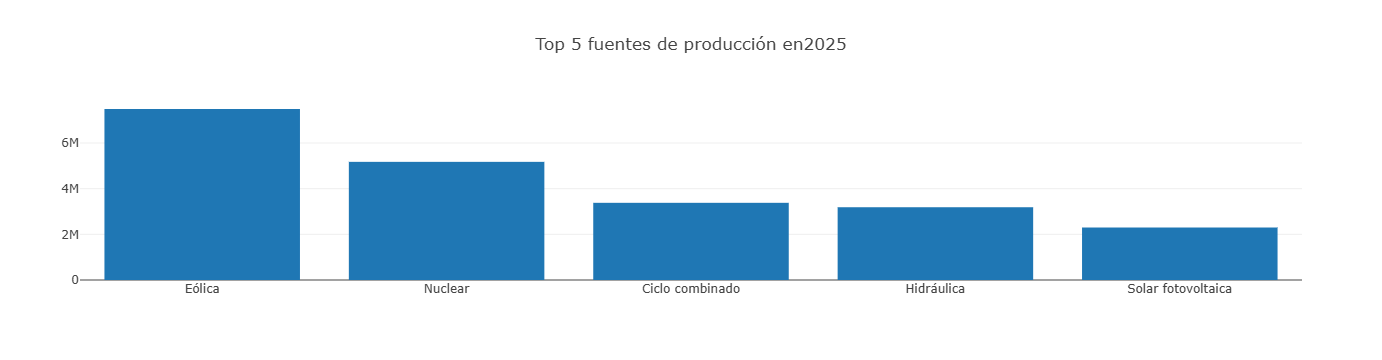

defined function top5anual
res9_1: String = "plot-44d82d06-e13d-4fb0-8779-208fce4e6d77"

In [9]:
def top5anual (df: DataFrame, Año: Int) = {
val energiasOrdenadas= df
    .filter(date_format(col("Fecha"),"yyyy") === Año) //Año
    .filter(col("Familia") =!= "Demanda")
    .filter(!col("Tipo").isin("Generación renovable", "Generación no renovable"))
    .groupBy($"Tipo")
    //.groupBy(date_format(col("FechaCompleta"), "yyyy-MM").as("Mes"))
    .agg(sum("Valor").as[Double].as("ValorTotal"))
    .orderBy($"ValorTotal".desc)

val seqValores = energiasOrdenadas.select($"ValorTotal").as[Double].head(5).toSeq
val seqTipo = energiasOrdenadas.select($"Tipo").as[String].head(5).toSeq
val layout = Layout().withTitle("Top 5 fuentes de producción en" + Año)
val data = Seq(Bar(
    seqTipo,
    seqValores,
))

plot(data, layout)
}
top5anual(dataFrameBalance, 2025)

collect at cmd10.sc:4

1 / 1

collect at cmd10.sc:4

1 / 1

collect at cmd10.sc:4

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

1 / 1

collect at cmd10.sc:5

14 / 14

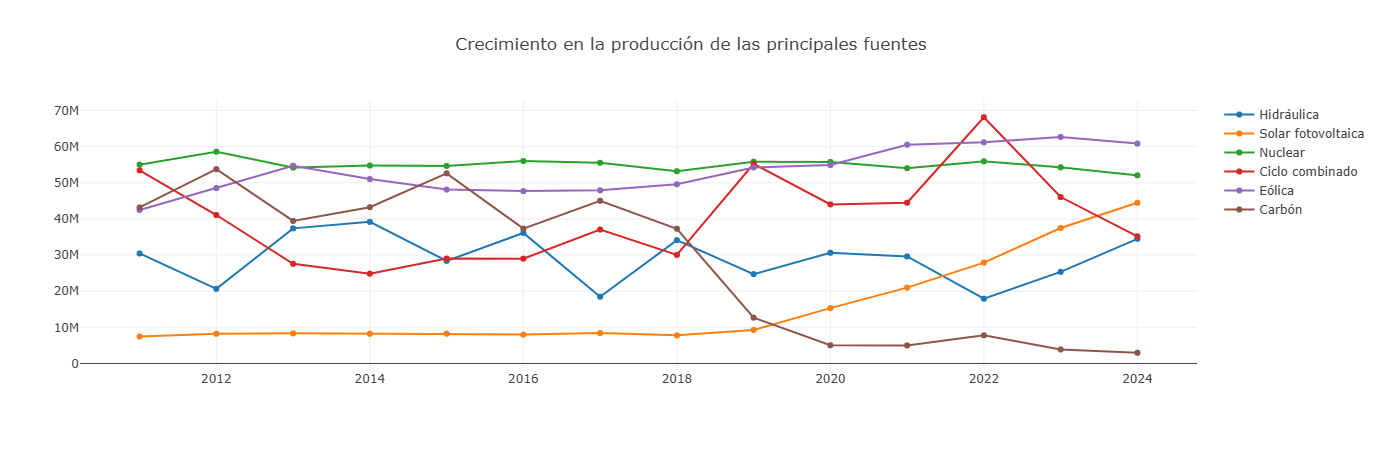

defined function AnalisisEnergiasAnual
EnergiasParaAnalizar: Seq[String] = List(
  "Hidr\u00e1ulica",
  "Solar fotovoltaica",
  "Nuclear",
  "Ciclo combinado",
  "E\u00f3lica",
  "Carb\u00f3n"
)

In [11]:
def AnalisisEnergiasAnual(listaEnergias: Seq[String], df: DataFrame): Unit = {

  val valores = listaEnergias.map(tipoEnergia => df.filter(col("Tipo") === tipoEnergia).orderBy("Año"))                                 
  val fechas = valores.head.select("Año").as[String].collect.toSeq
  val seqValores = valores.map(valor => valor.select("ValorAnual").as[Double].collect.toSeq)

  val traces = listaEnergias.zip(seqValores).map { case (nombre, seqValor) =>
    Scatter(fechas, seqValor, name = nombre)
  }
  val layout = Layout(title = "Crecimiento en la producción de las principales fuentes")
  val data = traces
  plot(data, layout)
}

val EnergiasParaAnalizar = Seq("Hidráulica", "Solar fotovoltaica", "Nuclear", "Ciclo combinado", "Eólica", "Carbón")
AnalisisEnergiasAnual(EnergiasParaAnalizar, dfGeneracionAnual)

In [7]:
dfGeneracionAnual.show()

show at cmd6.sc:1

1 / 1

+----+------------+--------------------+---------+--------------+--------------------+---------------------------+-------------+--------------------+------------------------+
| Año|     Familia|                Tipo|Compuesto|BajasEmisiones|          ValorAnual|PorcentajeAnualSobreFamilia|TotalGenerado|PorcentajeSobreTotal|PorcentajeBajasEmisiones|
+----+------------+--------------------+---------+--------------+--------------------+---------------------------+-------------+--------------------+------------------------+
|2011|   Renovable| Residuos renovables|    false|          true|   736055.7439999997|       0.009459560379872512|2.793538222E8|                0.26|                   50.71|
|2011|No-Renovable|    Turbina de vapor|    false|         false|   2634295.117000001|       0.013977839024369875|2.793538222E8|                0.94|                   50.71|
|2011|     Demanda|Saldo I. internac...|    false|         false|  -6090126.334000002|       0.023054055458754885|2.793538222